# Porto Seguro - Porto Seguro’s Safe Driver Prediction

Nothing ruins the thrill of buying a brand new car more quickly than seeing your new insurance bill. The sting’s even more painful when you know you’re a good driver. It doesn’t seem fair that you have to pay so much if you’ve been cautious on the road for years.

Porto Seguro, one of Brazil’s largest auto and homeowner insurance companies, completely agrees. Inaccuracies in car insurance company’s claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones.

In this competition, you’re challenged to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year. While Porto Seguro has used machine learning for the past 20 years, they’re looking to Kaggle’s machine learning community to explore new, more powerful methods. A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers. 


## Exploring the Data


In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")
submission = pd.read_csv("output/sample_submission.csv")
print ("data loaded!")

data loaded!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [2]:

train['output'] = train['target']


# TODO: Calculate number of students
n_rows = train.shape[0]

# TODO: Calculate number of features
n_features = train.shape[1]-1

# TODO: Calculate passing students
n_nao = (train.loc[train['target'] == 0]).shape[0]

# TODO: Calculate failing students
n_sim = (train.loc[train['target'] == 1]).shape[0]

# TODO: Calculate graduation rate
rate = (float(n_sim) / float(n_rows))* 100

# Print the results
print ("Total de linhas: {}".format(n_rows))
print ("Total de features: {}".format(n_features))
print ("Qu(antidade de nao ocorrencia: {}".format(n_nao))
print ("Quantidade de ocorrencia: {}".format(n_sim))
print ("Percentual: {:.2f}%".format(rate))

Total de linhas: 595212
Total de features: 59
Qu(antidade de nao ocorrencia: 573518
Quantidade de ocorrencia: 21694
Percentual: 3.64%


## Preparing the Data
Unbaleced data can be an issue

### Identify feature and target columns


In [3]:
# Extract feature columns
feature_cols = list(train.columns[:-1])

# Extract target column 'passed'
target_col = train.columns[-1] 

# Show the list of columns
print ("Feature columns:\n{}".format(feature_cols))
print ("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = train[feature_cols]
y_all = train[target_col]

# Show the feature information by printing the first five rows
print ("\nFeature values:")
print (X_all.head())

print(train.describe())

Feature columns:
['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']

Target column: output

Feature values:
   id  target  ps_ind_01  ps_ind_02_cat  

### Preprocess Feature Columns



In [4]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
       # if col_data.dtype == object:
        #    col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}")

Processed feature columns ({} total features):
{}


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# TODO: Import any additional functionality you may need here
from sklearn.model_selection import train_test_split

# TODO: Set the number of training points
#num_train = 300

# Set the number of testing points
#num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

#X_train = None
#X_test = None
#y_train = None
#y_test = None

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 476169 samples.
Testing set has 119043 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **

**1- Decision Trees:**

1.1 - Based on my research I figured out lot of application related to recomendation systems, That sounds to be  the most comun application for Decision tree. I'd like to cite a facebook application to sugest groups for user to join, that is interesting because there's bilions of user and tons of groups out there, and without an Artificial Intelligence system like that discover and sugest groups that is interesting for user would be impossible.
https://link.springer.com/chapter/10.1007%2F978-3-540-88875-8_41?LI=true


1.2 - The Decision tree performs well when:
Need to explain for business the features behaviors behind the model.
Don't need or want spend too much time on Feature engineering.
Need so support on feature selection - DT performs implicity selection.
It performs well with huge amount of data and take more time to train and less to predict.

1.3 - The disavantages of use the decision tree are:
The model can overfit easily while create a very complex trees.
Decision tree can be instable due to small variance in the data can modify drastically the trees.

1.4 That is binary classification problem, so decision tree models fits well because it's easy to understand the feature behavior and support me on the feature selection (implicit performed).
 
    
        
**2- Support Vector Machines (SVM)**


2.1 -  I'd like to cite a use case from BMC Medical Informatics and Decision Making that used SVM in a research of comun diseases. The best results hit around 83.5% of accuracy classifying patients with or without diabetes.
https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/1472-6947-10-16

2.2 - The SVM is a powerfull regretion and classification model, that is usually used for classifcation purpose, the biggest benefit of using this model is the flexibility of the parameter tunning, specially the kernel trick that give a great possibility for the model increase the accuracy.

2.3 - There's a limitation about the size and speed on both trainning and testing, it's recomended for small datasets, also applying the parameter tunning can create a very comple model, hard to interpret.

2.4 - Given a small dataset that was provided and the binary classification problem, SVM seems to be a good candidate to analyse the performance, The main reason of choose this model also is the possibiliy of parameter tunning to encrease the performance and also test a model linearly separabe.


**3- Ensemble Methods - Random Forest**

3.1 - I found out some use cases including a heavy usage on Kaggle competitions. One that I'd like to cite here is a project to predict the crime in San Francisco - CA. They used random forest  and hit around 72.4% of accuracy against the average 67.1% of a single decision tree.
https://algobeans.com/2016/08/25/random-forest-tutorial/


3.2 - The Random forest is widely used due to the easy implementation, ability to avoid overfit while the user increase the number of tree looking for more accuracy. Another positive point about Random Forest ensemble method is the ability to handle unbalancing dataset and finally can be used for large datasets.

3.3 - The training performance require a powerful hardware depending of the amount of parallel classifiers (Trees) you are training inside RF.

3.4 - I'm considering to use this model in this project due to the possibilite to compare the ensemble method against a single decision tree, and this model according to the course and my research works well for a binary classification problem.





### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [6]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred, pos_label=0)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for bproth training and testing
    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [7]:
# TODO: Import the three supervised learning models from sklearn
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier 

# TODO: Initialize the three models
clf_A = tree.DecisionTreeClassifier(random_state=0)
clf_B = svm.SVC(random_state=0)
clf_C = RandomForestClassifier(random_state=0)


print("#################Decision tree#################")
train_predict(clf_A, X_train, y_train, X_test, y_test)

#print("#################SVM#################")
#train_predict(clf_B, X_train, y_train, X_test, y_test)

print("#################ENSEMBLE-RANDOM FOREST#################")
train_predict(clf_C, X_train, y_train, X_test, y_test)



#################Decision tree#################
Training a DecisionTreeClassifier using a training set size of 476169. . .
Trained model in 2.1376 seconds
Made predictions in 0.3245 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.1278 seconds.
F1 score for test set: 1.0000.
#################ENSEMBLE-RANDOM FOREST#################
Training a RandomForestClassifier using a training set size of 476169. . .
Trained model in 15.1676 seconds
Made predictions in 1.5286 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.4817 seconds.
F1 score for test set: 1.0000.


# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn import model_selection
from sklearn import metrics
from sklearn import svm

# TODO: Create the parameters list you wish to tune
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

# TODO: Initialize the classifier
clf = svm.SVC(random_state=0)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer =  metrics.make_scorer(metrics.f1_score,pos_label=0)

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = model_selection.GridSearchCV(clf, param_grid=parameters,scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_


# Report the final F1 score for training and testing after parameter tuning
print ("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train)))
print ("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)))

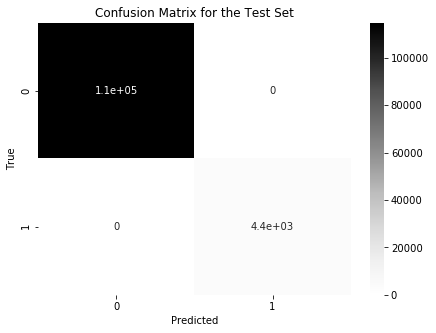

In [13]:
import seaborn as sns # Install using 'pip install seaborn'
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

cm_test = confusion_matrix(y_test, clf_A.predict(X_test))

plt.figure(figsize=(7,5))
sns.heatmap(cm_test, annot=True, cmap='Greys', xticklabels=[0,1], yticklabels=[0,1])
plt.title('Confusion Matrix for the Test Set')
plt.ylabel('True')
plt.xlabel('Predicted')